In [58]:
%matplotlib inline
import pandas as pd
from astropy.table import Table
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
from astropy.io import fits
from specbox import SpecSDSS
import multiprocessing

In [3]:
def sdss_spname(plate, mjd, fiberid):
#     if plate <= 2975:
#         plate = '{:0>4}'.format(plate)
    filename = 'spec-{:0>4}-{}-{:0>4}.fits'.format(plate, mjd, fiberid)
    return filename

In [31]:
sp = SpecSDSS('/store/public/databases/sdss_sample/old_sdss/spec-0685-52203-0470.fits')

/home/yuming/tools/specbox/specbox/basemodule/basemodule.py:308: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17


<AxesSubplot:xlabel='Wavelength (Angstrom)', ylabel='Flux (erg / (Angstrom cm2 s))'>

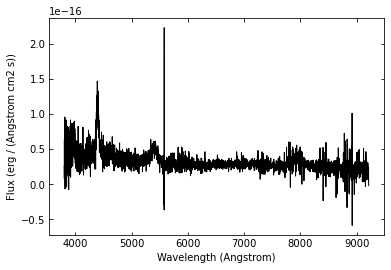

In [32]:
sp.plot()

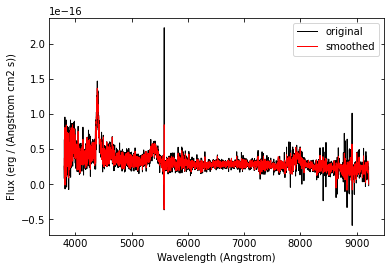

In [33]:
sp.smooth(5,3)

In [34]:
sp.trim([4000, 9000])

<AxesSubplot:xlabel='Wavelength (Angstrom)', ylabel='Flux (erg / (Angstrom cm2 s))'>

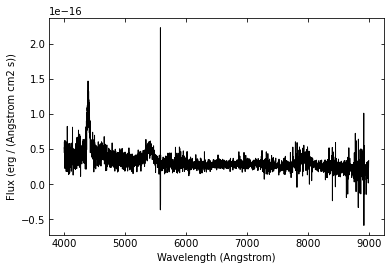

In [35]:
sp.plot()

In [36]:
len(sp.flux)

3522

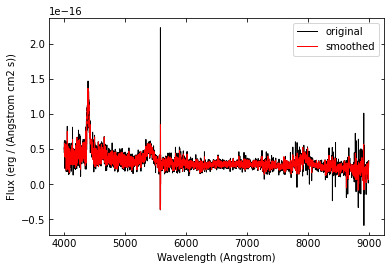

In [40]:
sp.smooth(5,3,inplace=True)

In [43]:
def spectransform(filename):
    sp = SpecSDSS(filename)
    sp.trim([4000, 9000])
    sp.smooth(5, 3, inplace=True, plot=False)
    f_norm = stats.zscore(sp.spec.flux.value)
    return f_norm

In [54]:
from glob import glob
flist = glob('/home/yuming/astro/ml_projects/mlFeLo/cnn/spec/train_v3/*fits')

In [55]:
flux_list = []

In [46]:
from os.path import basename
for i, item in enumerate(flist):
    f_norm = spectransform(item)
    filename = basename(item)
    flux_list.append(f_norm)
    print("No. {}: file {} done.".format(i, filename))

/home/yuming/tools/specbox/specbox/basemodule/basemodule.py:308: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17


No. 0: file spec-4495-55566-0086.fits done.
No. 1: file spec-6726-56394-0612.fits done.
No. 2: file spec-5146-55831-0886.fits done.
No. 3: file spec-5432-56008-0706.fits done.
No. 4: file spec-8290-57364-0032.fits done.
No. 5: file spec-7305-56991-0687.fits done.
No. 6: file spec-3692-55186-0936.fits done.
No. 7: file spec-10256-58193-0814.fits done.
No. 8: file spec-7823-56978-0604.fits done.
No. 9: file spec-9161-57691-0862.fits done.
No. 10: file spec-6453-56365-0322.fits done.
No. 11: file spec-5783-56017-0482.fits done.
No. 12: file spec-8744-58124-0632.fits done.
No. 13: file spec-4237-55478-0516.fits done.
No. 14: file spec-6783-56284-0880.fits done.
No. 15: file spec-7651-57654-0122.fits done.
No. 16: file spec-11314-58436-0671.fits done.
No. 17: file spec-10237-58154-0811.fits done.
No. 18: file spec-7656-57338-0048.fits done.
No. 19: file spec-4092-55477-0108.fits done.
No. 20: file spec-11302-58436-0226.fits done.
No. 21: file spec-10292-58113-0237.fits done.
No. 22: file sp

In [49]:
df = pd.DataFrame(flux_list)

In [50]:
df['filename'] = flist

In [51]:
df

,0,1,2,3,4,5,6,7,8,9,...,3513,3514,3515,3516,3517,3518,3519,3520,3521,filename
0,0.853064,1.408572,1.507156,1.159607,0.919105,1.307388,1.397651,1.213295,1.545990,1.826581,...,-0.187009,-0.490407,-0.465647,0.133427,0.238602,-0.226537,-0.348571,0.376605,0.070169,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
1,1.442230,0.352425,0.301981,-0.035313,-0.722033,-1.435096,-1.231076,-0.686655,-0.188144,0.136327,...,-0.840950,-1.063646,-0.747205,-0.084515,-0.028143,-1.177426,-1.381187,-0.745169,-1.455196,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
2,-0.674965,-0.026880,0.539849,0.845903,0.871105,0.379093,0.008625,1.785920,3.630478,2.199374,...,-0.558687,-0.770853,-0.969929,-1.104820,-0.786990,-0.958585,-1.207772,-1.183279,-0.221655,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
3,0.369291,0.524765,-0.444862,-0.934668,-0.957048,-0.530876,-0.182098,0.057326,-0.538041,-0.632231,...,-0.709788,-0.657970,-0.536896,-0.530959,-0.772172,-1.024839,-0.915249,-0.632210,-0.684053,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
4,3.204960,4.804960,4.038090,2.860959,2.183032,3.170253,4.541267,4.443553,2.820054,2.244929,...,-1.158704,-1.064437,-0.392855,-0.306477,-0.965193,-0.898575,-0.994876,-1.166042,-0.301369,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.984862,1.443027,1.660412,1.482648,1.425503,1.357315,1.547285,1.264206,1.344578,1.324499,...,-1.216973,-1.131437,-1.202107,-1.359292,-1.485591,-1.455276,-1.264678,-1.055400,-1.198185,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
96,-0.958144,-1.042633,-0.783617,-0.690979,-0.673148,-0.495997,0.219683,0.768939,0.195180,-0.167667,...,-0.711989,-0.606828,-1.163608,-1.085909,-0.687087,-0.763494,-1.033172,-0.406246,-0.197021,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
97,-0.943346,-1.288678,-1.164967,-1.224348,-1.471166,-1.155116,-0.372593,0.491411,0.671974,0.180244,...,-1.016209,-1.081199,-0.908927,-0.922467,-1.240326,-1.552437,-1.297614,-0.919446,-1.056516,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
98,1.769728,1.495506,1.518176,1.372870,1.511030,1.818427,1.942609,1.666997,1.806614,1.781983,...,-1.422668,-1.360369,-1.337941,-1.387107,-1.494732,-1.363078,-1.198473,-1.123094,-1.081465,/home/yuming/astro/ml_projects/mlFeLo/cnn/spec...


In [56]:
df1 = pd.read_csv('/home/yuming/astro/ml_projects/mlFeLo/cnn/spec/train_v3/train_all_bin_p1.csv')

In [57]:
df1

,Filename,Label,redshift
0,spec-7378-56715-0436.fits,FeLoBAL,2.239379
1,spec-3763-55508-0990.fits,FeLoBAL,2.315665
2,spec-3771-55544-0842.fits,FeLoBAL,1.567929
3,spec-11677-58510-0991.fits,FeLoBAL,1.588018
4,spec-4014-55630-0880.fits,FeLoBAL,2.244618
...,...,...,...
834,spec-5962-56265-0056.fits,Non-FeLoBAL,2.657000
835,spec-3655-55240-0764.fits,Non-FeLoBAL,2.510000
836,spec-7107-56740-0512.fits,Non-FeLoBAL,4.015000
837,spec-5059-56190-0562.fits,Non-FeLoBAL,2.154000


In [59]:
fullpath = '/home/yuming/astro/ml_projects/mlFeLo/cnn/spec/train_v3/' + df1['Filename']

In [60]:
fullpath

0      /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
1      /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
2      /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
3      /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
4      /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
                             ...                        
834    /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
835    /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
836    /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
837    /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
838    /home/yuming/astro/ml_projects/mlFeLo/cnn/spec...
Name: Filename, Length: 839, dtype: object

In [61]:
pool = multiprocessing.Pool(processes=80)
outputs = pool.map(spectransform, fullpath.values)

/home/yuming/tools/specbox/specbox/basemodule/basemodule.py:308: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17
/home/yuming/tools/specbox/specbox/basemodule/basemodule.py:308: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17
/home/yuming/tools/specbox/specbox/basemodule/basemodule.py:308: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17
/home/yuming/tools/specbox/specbox/basemodule/basemodule.py:308: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17
/home/yuming/tools/specbox/specbox/basemodule/basemodule.py:308: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17
/home/yuming/tools/specbox/specbox/basemodule/basemodule.py:308: RuntimeWarning: divide by zero encountered in power
  self.err = data['ivar']**-0.5 * 1e-17
/home/yuming/tools/specbox/specbox/basemodule/basemodule.p

In [63]:
dfspec = pd.DataFrame(outputs)

In [64]:
dfspec.shape

(839, 3522)

In [65]:
df1.columns

Index(['Filename', 'Label', 'redshift'], dtype='object')

In [61]:
# dfs = df.loc[:,['RA', 'DEC', 'PLATE', 'MJD', 'FIBERID', 'Z']]

In [66]:
dfspec = dfspec.join(df1)

In [67]:
dfspec.head()

,0,1,2,3,4,5,6,7,8,9,...,3515,3516,3517,3518,3519,3520,3521,Filename,Label,redshift
0,-0.272950,1.056850,0.541104,-0.425962,-0.290942,0.247559,0.736341,0.315651,0.096573,-0.118562,...,2.396678,2.723467,2.328005,2.140936,2.422459,2.835612,2.595600,spec-7378-56715-0436.fits,FeLoBAL,2.239379
1,0.437413,0.597947,0.765858,0.817063,0.831437,0.991502,1.048408,1.143962,1.006748,0.793228,...,-0.813932,-0.900805,-1.067298,-1.159893,-1.012454,-0.836310,-0.565390,spec-3763-55508-0990.fits,FeLoBAL,2.315665
2,-1.432960,-1.024800,-1.287398,-1.660437,-1.546280,-1.313383,-1.302834,-1.382930,-1.353146,-1.317502,...,1.380772,1.382211,1.287288,1.102472,1.093720,1.348487,1.024443,spec-3771-55544-0842.fits,FeLoBAL,1.567929
3,-4.122627,-3.528450,-3.133138,-2.783693,-2.433680,-1.853307,-1.583229,-1.570417,-1.673850,-1.753690,...,-0.426877,-0.280805,-0.126278,-0.211044,-0.273270,-0.100862,0.005425,spec-11677-58510-0991.fits,FeLoBAL,1.588018
4,-0.589485,-0.450383,-0.775628,-1.284829,-1.646684,-1.498073,-1.014081,-0.498082,-0.015552,0.352968,...,0.178782,0.253349,0.477122,0.291706,0.143951,0.471743,0.852256,spec-4014-55630-0880.fits,FeLoBAL,2.244618


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521],
           dtype='int64', length=3522)

In [72]:
dfspec.dropna(subset=pd.Index(np.arange(3522)), inplace=True)

In [73]:
dfspec.reset_index(drop=True, inplace=True)

In [74]:
# dfspec.to_csv('train_v3_fnorm.csv', index=False)

In [78]:
dfspec.to_csv('train_v3_fnorm.csv', index=False)

In [79]:
dftest = pd.read_csv('train_v3_fnorm.csv')

In [81]:
# dftest

In [89]:
arr1 = dfspec.loc[:,pd.Index(np.arange(3522))].values

In [93]:
arr1.mean(axis=0)

array([ 0.62664549,  0.58049722,  0.54389899, ..., -0.54370868,
       -0.37341465, -0.32837646])